In [2]:
import pandas as pd
ads = pd.read_csv("Advertising.csv")
df = ads.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df = df.iloc[:, 1:len(df)]

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [7]:
df.isnull().values.any()

False

In [8]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


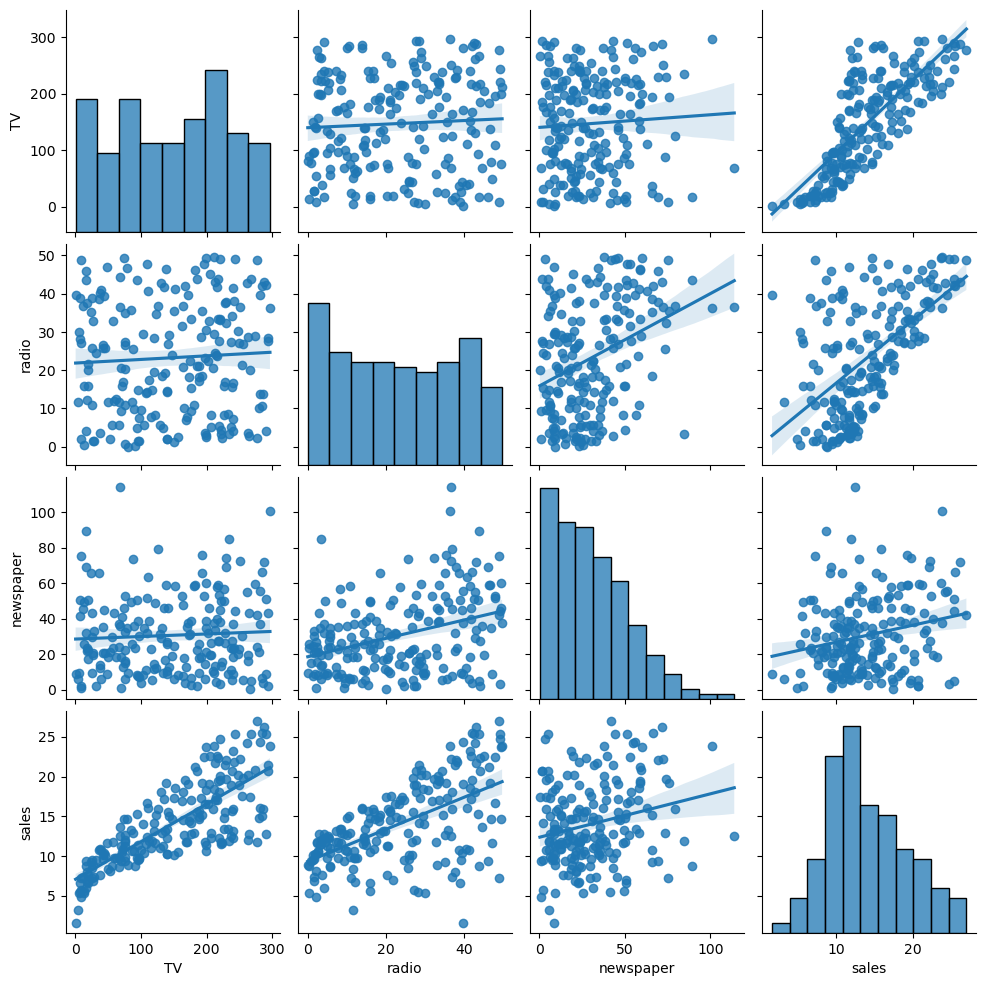

In [10]:
import seaborn as sns
sns.pairplot(data=df, kind="reg" )

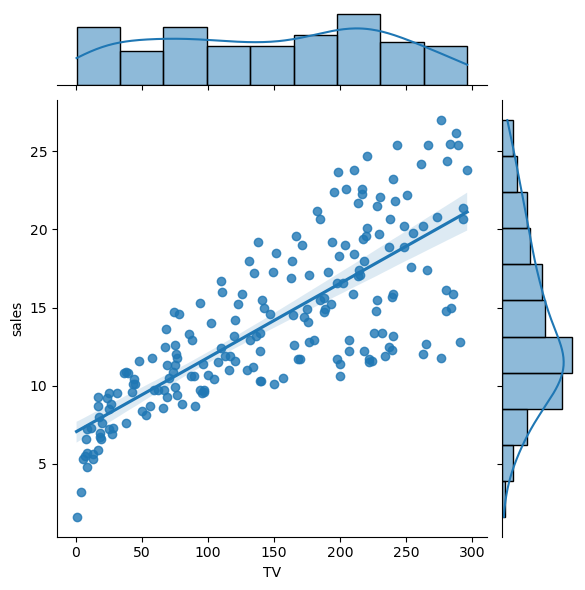

In [11]:
sns.jointplot(x="TV", y="sales", kind="reg", data=df);

In [12]:
import statsmodels.api as sm

x = df[["TV"]]
x[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [13]:
x = sm.add_constant(x)
x[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [14]:
y = df[["sales"]]
y[0:5]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [18]:
lin_mod = sm.OLS(y,x)

In [19]:
model = lin_mod.fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           1.47e-42
Time:                        15:07:06   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
import statsmodels.formula.api as smf

lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           1.47e-42
Time:                        00:55:32   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model.params
# Beta 0 - Beta 1 values

const    7.032594
TV       0.047537
dtype: float64

In [19]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [22]:
model.conf_int() #confidence interval

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


In [23]:
print("f_pvalue : %.4f" % model.f_pvalue)

f_pvalue : 0.0000


In [27]:
print("fvalue : %.3f" % model.fvalue)

fvalue : 312.145


In [36]:
print("tvalue : %.3f" % model.tvalues[0:1])

tvalue : 15.360


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23768\527211591.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("tvalue : %.3f" % model.tvalues[0:1])


In [24]:
float(model.tvalues.iloc[0])

15.360275174117547

In [42]:
model.mse_model # this mse is so high and the model is not valid and usable
# it is for just learning

3314.618166868649

In [40]:
model.rsquared_adj

0.6099148238341623

In [ ]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [45]:
y[0:5]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [48]:
#mathematical explanation for this model
print(str("Sales: %.2f" % model.params.iloc[0]) + " + TV" + "*" + str("%.2f" % model.params.iloc[1]))

Sales: 7.03 + TV*0.05


(0.0, 28.27)

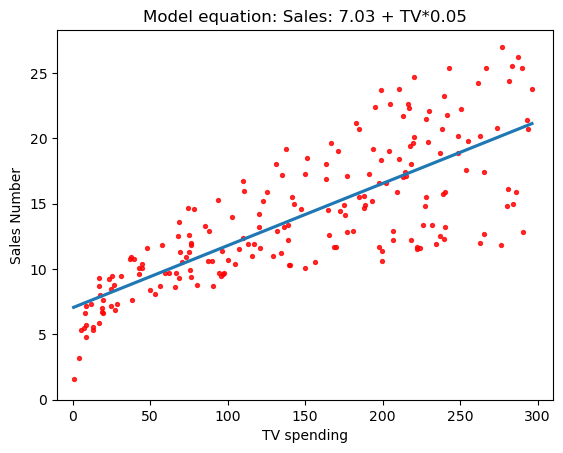

In [54]:
import matplotlib.pyplot as plt
g = sns.regplot(x="TV", y="sales", data=df, ci=None, scatter_kws={"color": "r", "s": 8})
g.set_title("Model equation: Sales: 7.03 + TV*0.05")
g.set_ylabel("Sales Number")
g.set_xlabel("TV spending")
plt.xlim(-10, 310)
plt.ylim(bottom = 0)


In [58]:
#Alternative

from sklearn.linear_model import LinearRegression

x = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X=x,y=y)
model.intercept_

7.032593549127693

In [59]:
model.coef_

array([0.04753664])

In [60]:
model.score(x,y)

0.611875050850071

In [62]:
model.predict(x)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [ ]:
#what is the sales with 30 TV advertisement
#with equation
print("result: %.2f" % (7.03 + 30* 0.05))

result: 8.53


In [66]:
#with prediction
model.predict([[30]])

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

In [67]:
new_requests = [[5],[90],[200]]
model.predict(new_requests)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 7.27027675, 11.31089119, 16.53992164])

In [72]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)

In [74]:
import numpy as np
rmse = np.sqrt(mse)
rmse

3.2423221486546887

In [75]:
reg.predict(x)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [76]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [77]:
compare_table = pd.DataFrame({"y": y[0:10],
                              "predict_y": reg.predict(x)[0:10]
                              })

compare_table

,y,predict_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [78]:
compare_table["error"] = compare_table["y"] - compare_table["predict_y"]
compare_table

,y,predict_y,error
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [80]:
residuals = y - y_pred

residuals[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
Name: sales, dtype: float64

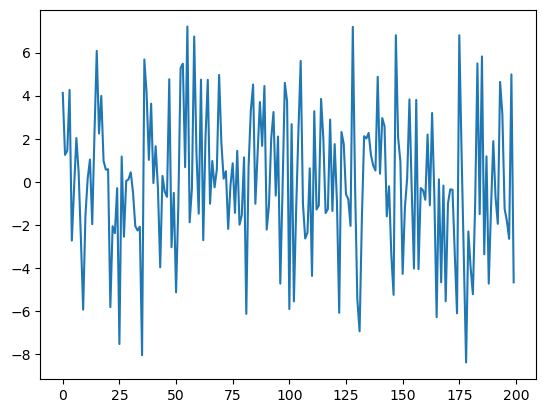

In [82]:
plt.plot(residuals)